In [1]:
%env AWS_PROFILE dev

env: AWS_PROFILE=dev


In [2]:
!aws s3 ls

2024-01-04 05:42:12 bgp-ls-demo
2023-12-11 18:23:17 co-graph-drive-bucket-1
2023-06-05 05:14:22 deployed-ignatella-app-pets
2023-04-26 01:07:08 deployed-ignatella-tfstate
2024-03-18 12:22:52 ignatella-ray
2023-06-16 10:25:15 pt-ignatella-tfstate
2024-03-26 17:06:02 sagemaker-eu-north-1-422901541742
2024-03-26 14:51:07 sagemaker-studio-422901541742-45qvfhp8mmb
2024-03-26 14:39:15 sagemaker-studio-422901541742-dy8sadfa9t8
2024-03-26 17:05:58 sagemaker-studio-422901541742-ysuogi77x5e
2024-03-26 14:39:18 sagemaker-us-east-1-422901541742


In [5]:
import boto3

client = boto3.client('textract', region_name="eu-west-1")

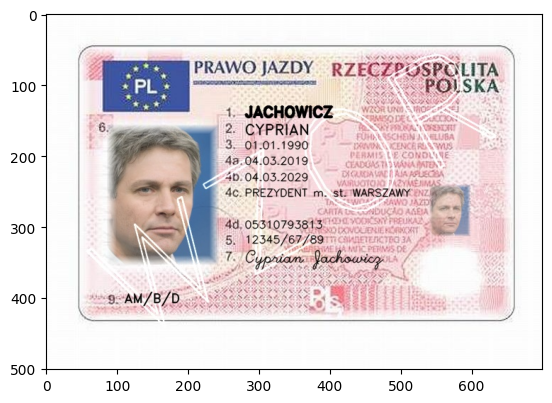

In [3]:
# with opecnv show ./driving-licence/person01.jpg

import cv2
import matplotlib.pyplot as plt

image_path = './driving-licence/person01.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [39]:
with open(image_path, "rb") as document_file:
    document_bytes = document_file.read()

response = client.analyze_document(
    Document={"Bytes": document_bytes}, 
    FeatureTypes=['LAYOUT', 'QUERIES'], 
    QueriesConfig={
        'Queries': [
            {
                'Text': 'What is the document title?'
            },
            {
                'Text': 'What is written in section 1?'
            },
            {
                'Text': 'What is written in section 2?'
            },
            {
                'Text': 'What is written in section 3?'
            },
            {
                'Text': 'What is written in section 4d?'
            },
            {
                'Text': 'What is written in section 5?'
            },
            {
                'Text': 'What is written in section 9?'
            }
        ]
    },
)

In [40]:
queries = [block for block in response['Blocks'] if block['BlockType'].startswith('QUERY')]

questions = [query['Query']['Text'] for query in queries if query['BlockType'] == 'QUERY']
answers = [query['Text'] for query in queries if query['BlockType'] == 'QUERY_RESULT']

for question, answer in zip(questions, answers):
    print(f"{question}: {answer}")

What is the document title?: PRAWO JAZDY
What is written in section 1?: JACHOWICZ
What is written in section 2?: CYPRIAN
What is written in section 3?: 01.01.1990
What is written in section 4d?: 05310793813
What is written in section 5?: 12345/67/89
What is written in section 9?: AM/B/D


In [31]:
response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 0.9052553176879883,
     'Height': 0.8341295123100281,
     'Left': 0.044464804232120514,
     'Top': 0.0616295225918293},
    'Polygon': [{'X': 0.044464804232120514, 'Y': 0.06405039131641388},
     {'X': 0.9486238956451416, 'Y': 0.0616295225918293},
     {'X': 0.9497201442718506, 'Y': 0.8920960426330566},
     {'X': 0.04680866748094559, 'Y': 0.8957590460777283}]},
   'Id': '6b19c374-86ee-411e-9395-083dc07f0cdc',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['847b91f2-385b-48ed-a30b-081c8e8150af',
      '8e5edaaf-ab06-42f6-99c4-9e8952e02944',
      '84fd36ce-cffd-437a-8479-135d23467cd0',
      '3655bcaa-f6a6-4a11-83fe-b0b4a7ed925e',
      '321e79f9-7a0b-4315-8976-9804c338e669',
      '06dd2270-eab3-4b28-a830-3e0c9b36ab38',
      '11cd4134-6f5c-401e-880e-728edd3e85fd',
      'f3302c39-1df5-4921-a8c2-e80b32553c9e',
      'fe7e7a16-f3e1-468b-a30a-10a58605093c',
      'c0fad4

In [8]:
[b['Text'] for b in response['Blocks'] if b['BlockType'] == 'WORD']

['PRAWO',
 'JAZDY',
 'RZECZPOSPOLITA',
 'PL',
 '*',
 'POLSKA',
 '1.',
 'JACHOWICZ',
 '6.',
 '2.',
 'CYPRIAN',
 '3.',
 '01.01.1990',
 '4a.04.03.2019',
 'PERMIS',
 'Life',
 'CONDLINE',
 'CEADGAS',
 'WANAPATENTA',
 '4b.04.03.2029',
 'KOUDAV',
 'AJA APUECBA',
 'VAIRUOTONO',
 'AZYMENMAS',
 '4c.',
 'PREZYDENT',
 'm.',
 'st.',
 'WARSZAWY',
 'ENZ',
 'JAZD',
 'CARTA',
 'Dr.',
 'AGEIA',
 '4d.',
 '05310793813',
 '5.',
 '12345/67/89',
 '3A',
 'MNC',
 'PERMIS',
 'DE',
 '7.',
 'Cyprian',
 'Jachowicz',
 '9:',
 'AM/B/D']